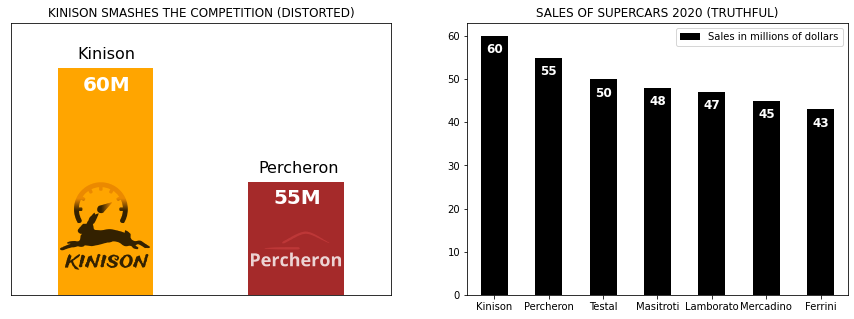

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# -------------------- FUNCTIONS --------------------

def calculate_center(df, index):
    name = df.loc[index, 'BRANDS']
    divg = (len(name) * 0.2) / 3

# --------------------- DATA ------------------------

sales = pd.Series([43, 47, 48, 45, 50, 55, 60])
colors = pd.Series(['#b80002', '#fec72f', 'silver', 'black', 'red', 'brown', 'orange'])
brands = pd.Series(['Ferrini', 'Lamborato', 'Masitroti', 'Mercadino', 'Testal', 'Percheron', 'Kinison'])

sales_by_brand = (pd
    .DataFrame({'SALES': sales, 'BRANDS': brands, 'COLORS': colors})
    .sort_values('SALES', ascending=False))

# CHART
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

image1 = mpimg.imread('kinison.png')
fig.figimage(image1, 55, 43, zorder=0, alpha=.8)

image2 = mpimg.imread('percheron.png')
fig.figimage(image2, 246, 20, zorder=0, alpha=.8)

# --------------------- DISTORTED -------------------
distorted_data = sales_by_brand.iloc[:2]
distorted_cols = distorted_data['COLORS']

distorted_plot = distorted_data.plot.bar(
    x='BRANDS', 
    y='SALES', 
    title='KINISON SMASHES THE COMPETITION (DISTORTED)',    
    ax=ax1,
    legend=False,
    color=distorted_cols)

ax1.set_ylim(ymin=50, ymax=62)
ax1.set_yticks([])
ax1.set_xticks([])
distorted_plot.set_xlabel('')

for i, (p, pr) in enumerate(zip(distorted_data.index, distorted_data['SALES'])):
    divg = calculate_center(distorted_data, p)
    brand = distorted_data.loc[p, 'BRANDS']
    distorted_plot.text(s="{}M".format(pr), x=i-0.12, y=pr - 1, color='w', weight="bold", size=20)
    if 'ini' in brand:
        distorted_plot.text(s=brand, x=i-0.15, y=pr+0.4, size=16)
    else:
        distorted_plot.text(s=brand, x=i-0.20, y=pr+0.4, size=16)
        

# ----------------------- TRUTHFUL -------------------
truthful_data = sales_by_brand.copy()
truthful_cols = truthful_data['COLORS']
truthful_plot = truthful_data.plot.bar(
    x='BRANDS', 
    y='SALES', 
    title='SALES OF SUPERCARS 2020 (TRUTHFUL)',
    ax=ax2,
    color='black')

truthful_plot.legend(['Sales in millions of dollars'])
truthful_plot.set_xlabel('')
plt.xticks(rotation=0)

for i, (p, pr) in enumerate(zip(truthful_data.index, truthful_data['SALES'])):
    truthful_plot.text(s=pr, x=i-0.15, y=pr-4, color='w', weight="bold", size=12)